In [1]:
x = [1, 2, 3]
a = [1]
b = [2]
y = [a, b]
x.extend(y)
a[0] = 10
x


[1, 2, 3, [10], [2]]

In [2]:
x = {"a":1, "b":2}
try:
    x.pop("c")
except:
    pass
x

{'a': 1, 'b': 2}

In [3]:
x = {"a":1}
x.pop("a")
a

[10]

In [4]:
a = 3

In [5]:
from pathlib import Path 
root = Path("./a/b")
str(root / '**/data.mdb')

'a/b/**/data.mdb'

In [6]:
import glob
print(str(Path(".").absolute()/"*.py"))
glob.glob(str(Path(".").absolute()/"**/*.py"), recursive=True)



/home/MH2/PARSeq/mh_test/*.py


['/home/MH2/PARSeq/mh_test/test.py',
 '/home/MH2/PARSeq/mh_test/aaaa.py',
 '/home/MH2/PARSeq/mh_test/aaa/abbb.py']

In [7]:
x = Path("./a/b/c")
y = Path("./a/b/")
y.relative_to(x)
# x.relative_to(y)

ValueError: 'a/b' is not in the subpath of 'a/b/c' OR one path is relative and the other is absolute.

In [ ]:
from torch.utils.data import Dataset

class DatasetA(Dataset):
    def __len__(self):
        return 10
    
    def __getitem__(self, idx):
        return idx

class DatasetB(Dataset):
    def __len__(self):
        return 10
    
    def __getitem__(self, idx):
        return idx+10
    

x = DatasetA() + DatasetB()
x.__len__()
len(x)

x[0]
x[1]
x[19]

19

In [ ]:
class A:
    def __call__(self, x):
        print("hello", x)


A()(1)

hello 1


In [ ]:
import re


prog = re.compile(f'[^{re.escape("abc")}]')
label = "asㄴㄴㄴ나"
label = prog.sub("@", label)
label

'a@@@@@'

In [ ]:
class CharsetAdapter:
    """Transforms labels according to the target charset."""
    """
    label(사실 임의의 문자열)에 대해 사용하기로 한 문자 외의 것들을 모두 제거해주는 객체
    당연히 대상 문자열을 주어야 하고, 대문자만 쓰는지 소문자만 쓰는지고 검사를 해서
    예로 소문자만 쓰는 경우 검사 결과 문자열을 먼저 소문자로 바꾼 뒤 검사해줌
    한글만 사용한다면 큰 의미는 없을 듯
    사용방법은 객체를 직접 호출하는 방식 => 객체.(문자열)
    대상이 아닌 문자열을 모두 제거한 깨끗한 문자열 반환
    """

    def __init__(self, target_charset) -> None:
        # an example of target_charset => "0123456789abcdefghijklmnopqrstuvwxyz"
        super().__init__()
        self.lowercase_only = target_charset == target_charset.lower() 
        # 혹시 대상 문자열이 모두 소문자이면 소문자 전용이라 생각
        # 추후 검사 대상 문자열을 모두 소문자로 바꾸기 위함
        self.uppercase_only = target_charset == target_charset.upper()
        # 이것도 마찬가지로 모두 대문자만 사용하는지 검사
        self.unsupported = re.compile(f'[^{re.escape(target_charset)}]')
        # self.unsupported는 어떤 문자에 대해 지원되지 않는지 여부를 알기 위핸 re 객체
        # self.unsupported(문자열)을 넣었을 때 문자열 중 지원되지 않는 문자를 찾을 수 있다.
        # 정확한 것은 re의 사용법을 알아야 하겠다. 
        # 일단 [^abc] 라는 정규표현식은 abc 셋 중 하나로 시작하지 않는 문자를 말한다.
        # 그리고 한글자를 의미하기 때문에 글자 단위로 적용된다.

    def __call__(self, label):
        # 객체에 괄호 치고 인자 넘기며 함수취급했을 때 호출되는 함수
        # ex) 인스턴스(x, y,... )
        if self.lowercase_only:
            label = label.lower()
        elif self.uppercase_only:
            label = label.upper()
        # Remove unsupported characters
        label = self.unsupported.sub('', label)
        # label에서 제거 대상(unsupported에 검사에서 true가 나오는 것)을 ""로 바꾼다.
        # 즉 지운다. 그 후 결과를 반환
        # 결과적으로 대상이 아닌 문자는 모두 제거 
        return label
import string
CharsetAdapter(string.ascii_letters)("한명훈 ab")


'ab'

In [ ]:
class A:
    def get(self):
        return [1, 2, 3]
    
with A() as a:
    a.get()

AttributeError: __enter__

In [ ]:
print("abc".encode("한utf-8"))
"abc".encode("한utf-8").decode('utf-8')
"abc".encode()

b'abc'


b'abc'

In [ ]:
print("한abc".encode("utf-8"))
"한abc".encode("cp949")

b'\xed\x95\x9cabc'


b'\xc7\xd1abc'

In [ ]:
a = 1
a += 1
a

2

In [ ]:
"09d"
"09d".encode()

b'09d'

In [ ]:
x = "a b c"
print(x)
print(x.split())
"".join(x.split())


a b c
['', ' b c']


'abc'

In [ ]:
"        "

'        '

In [8]:
import unicodedata

value = "1"
name = unicodedata.name(value) # key
unicodedata.lookup(name)
unicodedata.bidirectional(value)



value = "한"
name = unicodedata.name(value) # key
unicodedata.lookup(name)
unicodedata.bidirectional(value)

'L'

In [9]:
def unicode_test(value):
    name = unicodedata.name(value)
    value = unicodedata.lookup(name)
    direction = unicodedata.bidirectional(value)
    print(f"value = {value}, name = {name}, bidirection = {direction}")

unicode_test("한")
unicode_test("명")
unicode_test("훈")

value = 한, name = HANGUL SYLLABLE HAN, bidirection = L
value = 명, name = HANGUL SYLLABLE MYEONG, bidirection = L
value = 훈, name = HANGUL SYLLABLE HUN, bidirection = L


In [10]:

str(b"0061".decode())

'0061'

In [11]:
b"/u0394".decode()

'/u0394'

In [12]:
"한".encode()

b'\xed\x95\x9c'

In [13]:
f"a{10:09d}"


'a000000010'

/home/MH2/PARSeq/mh_test/../dataset/lock.mdb
<class 'str'>


Error: /home/MH2/PARSeq/mh_test/../dataset/lock.mdb: Not a directory

In [15]:
from pathlib import Path
import lmdb
import io
from PIL import Image

env = lmdb.open(str(Path("./../dataset/train/synth/MJ/test/").absolute()))
# env = lmdb.open(str(Path("./../dataset/val/synth/MJ/val/").absolute()))
with env.begin() as txn:
    print(txn.get("num-samples".encode()))
    print(txn.get(f"label-{1:09d}".encode()))
    buf = io.BytesIO(txn.get(f"image-{1:09d}".encode()))
    img = Image.open(buf)

img

b'891924'
b'slinking'


In [16]:
from ray import tune
tune.loguniform(1, 10).lower
tune.loguniform(1, 10).upper

10

In [17]:
import numpy as np
np.logspace(1, 10, 5)

array([1.00000000e+01, 1.77827941e+03, 3.16227766e+05, 5.62341325e+07,
       1.00000000e+10])

In [18]:
np.clip(1000, 2, 100)

100

In [19]:
import torch 
print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB', 'Cached:', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

Allocated: 0.0 GB Cached: 0.0 GB


/opt/conda/lib/python3.10/site-packages/torch/cuda/memory.py:395: FutureWarning: torch.cuda.memory_cached has been renamed to torch.cuda.memory_reserved
  warnings.warn(


In [20]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

In [7]:
from torchvision.transforms.functional import to_pil_image

In [17]:
import torch
from PIL import Image
from strhub.data.module import SceneTextDataModule
from strhub.models.parseq.system import *
from pathlib import Path
import glob
# Load model and image transforms
parseq = torch.hub.load('baudm/parseq', 'parseq', pretrained=True).eval()

# path = "/home/MH2/PARSeq/ray_results/parseq/2023-09-24_11-16-19/train_cc9700f8_1_lr=0.0020_2023-09-24_11-16-25/checkpoint_epoch=7-step=3632/checkpoint"
# x = torch.load(path)
# parseq.load_state_dict(x["state_dict"])

def f(path):
    img_transform = SceneTextDataModule.get_transform(parseq.hparams.img_size)

    # img = Image.open('/path/to/image.png').convert('RGB')
    # img = Image.open('./demo_images/art-01107.jpg').convert('RGB')/
    img = Image.open(path).convert('RGB')
    
    # img = Image.open('./demo_images/aa.jpg').convert('RGB')
    img = img_transform(img).unsqueeze(0)
    # img.show()
    logits = parseq(img)
    logits.shape  # torch.Size([1, 26, 95]), 94 characters + [EOS] symbol
    # print(f"logits: {logits}")

    # Greedy decoding
    pred = logits.softmax(-1)

    # print(f"logits: {logits}")
    label, confidence = parseq.tokenizer.decode(pred)
    print(f'{path.split("/")[-1]} => {label[0]}')



x = glob.glob(str(Path("./demo_images").absolute()/"**"))
print(x)
for path in x:
    f(path)
# f(name)

Using cache found in /root/.cache/torch/hub/baudm_parseq_main


['/home/MH2/PARSeq/demo_images/번개 문자.jpg', '/home/MH2/PARSeq/demo_images/글자체 다양.jpg', '/home/MH2/PARSeq/demo_images/한글.jpg', '/home/MH2/PARSeq/demo_images/측면 각도 (숫자).jpg', '/home/MH2/PARSeq/demo_images/측면 (영어, 숫자).jpg', '/home/MH2/PARSeq/demo_images/흐림 (영어).png', '/home/MH2/PARSeq/demo_images/흐림2 (영어).png', '/home/MH2/PARSeq/demo_images/곡선 (영어).jpg', '/home/MH2/PARSeq/demo_images/마스킹2 (영어).png', '/home/MH2/PARSeq/demo_images/마스킹1 (영어).png', '/home/MH2/PARSeq/demo_images/마스킹3 (영어).png', '/home/MH2/PARSeq/demo_images/원본.png', '/home/MH2/PARSeq/demo_images/흐림3.jpg', '/home/MH2/PARSeq/demo_images/넓은 이미지.jpg', '/home/MH2/PARSeq/demo_images/흐림4.png', '/home/MH2/PARSeq/demo_images/흐림 5.jpg', '/home/MH2/PARSeq/demo_images/흐림6.jpg', '/home/MH2/PARSeq/demo_images/특수 문자.jpg', '/home/MH2/PARSeq/demo_images/특수 문자2.jpg', '/home/MH2/PARSeq/demo_images/곡선.jpg']


ValueError: not enough values to unpack (expected 4, got 3)

0 /home/MH2/PARSeq/dataset/test/ArT/data.mdb
1 /home/MH2/PARSeq/dataset/test/ArT/lock.mdb
2 /home/MH2/PARSeq/dataset/test/COCOv1.4/data.mdb
3 /home/MH2/PARSeq/dataset/test/COCOv1.4/lock.mdb
4 /home/MH2/PARSeq/dataset/test/CUTE80/data.mdb
5 /home/MH2/PARSeq/dataset/test/CUTE80/lock.mdb
6 /home/MH2/PARSeq/dataset/test/IC13_857/data.mdb
7 /home/MH2/PARSeq/dataset/test/IC13_857/lock.mdb
8 /home/MH2/PARSeq/dataset/test/IC13_1015/data.mdb
9 /home/MH2/PARSeq/dataset/test/IC13_1015/lock.mdb
10 /home/MH2/PARSeq/dataset/test/IC13_1095/data.mdb
11 /home/MH2/PARSeq/dataset/test/IC13_1095/lock.mdb
12 /home/MH2/PARSeq/dataset/test/IC15_1811/data.mdb
13 /home/MH2/PARSeq/dataset/test/IC15_1811/lock.mdb
14 /home/MH2/PARSeq/dataset/test/IC15_2077/data.mdb
15 /home/MH2/PARSeq/dataset/test/IC15_2077/lock.mdb
16 /home/MH2/PARSeq/dataset/test/IIIT5k/data.mdb
17 /home/MH2/PARSeq/dataset/test/IIIT5k/lock.mdb
18 /home/MH2/PARSeq/dataset/test/SVT/data.mdb
19 /home/MH2/PARSeq/dataset/test/SVT/lock.mdb
20 /home/M

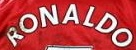